In [15]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, \
                    cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [11]:
len(contours)

2

In [10]:
contours[0].shape

(312, 1, 2)

In [12]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

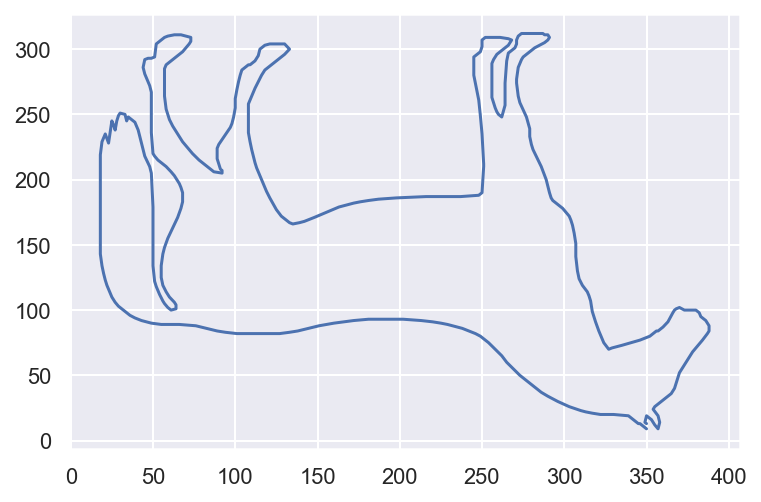

In [13]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

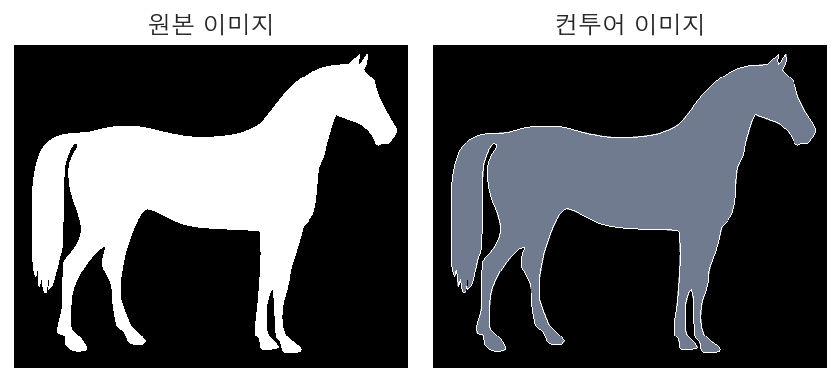

In [16]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [18]:
cv2.contourArea(c0)

42355.0

In [19]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)

(2203.678272008896, 2199.678272008896)

In [20]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(18, 9, 371, 304)

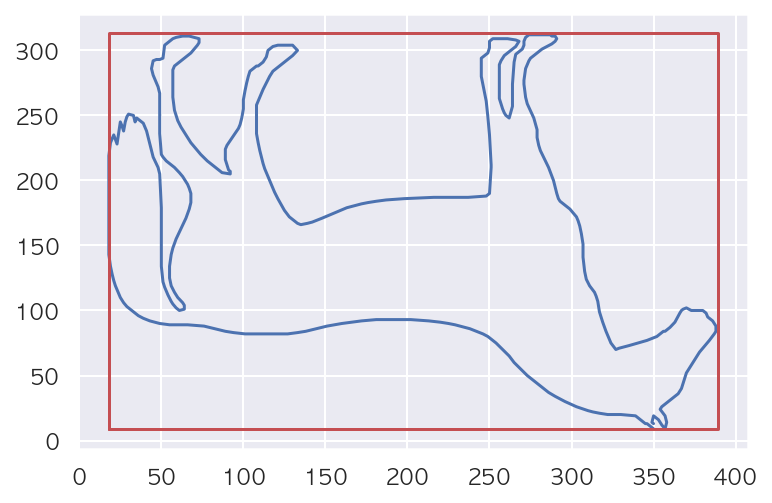

In [21]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

In [22]:
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

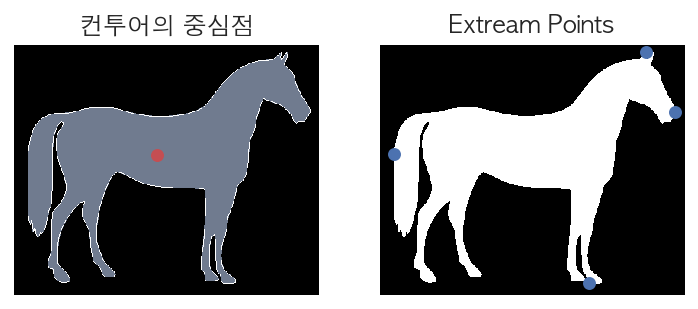

In [23]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

###### 연습 문제
    다음 왼쪽 이미지를 컨투어 처리하여 오른쪽 이미지와 같이 꼭지점을 계산하라. 이미지는 다음 명령으로 내려받는다.

In [24]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2020-08-11 11:31:08--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net (datascienceschool.net)... 114.202.2.86
Connecting to datascienceschool.net (datascienceschool.net)|114.202.2.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731251 (2.6M) [image/png]
Saving to: ‘receipt.png’

receipt.png         100%[===================>]   2.60M  7.59MB/s    in 0.3s    

2020-08-11 11:31:08 (7.59 MB/s) - ‘receipt.png’ saved [2731251/2731251]



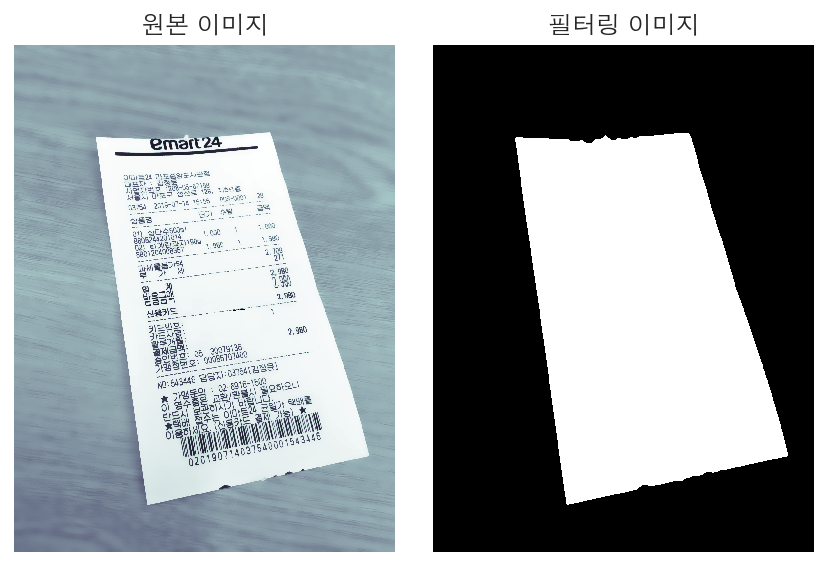

In [95]:
import cv2

img = cv2.imread('./receipt.png') # 데이터 로드
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이톤으로 변환

img = cv2.bilateralFilter(img, 30, 30, 30)
_, thresh1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY) # thresh 설정

thresh1 = cv2.medianBlur(thresh1, 11) # 중앙값 블러

img_result = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_result, cmap='bone')
plt.title("필터링 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [96]:
contours, hierachy = cv2.findContours(img_result, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]

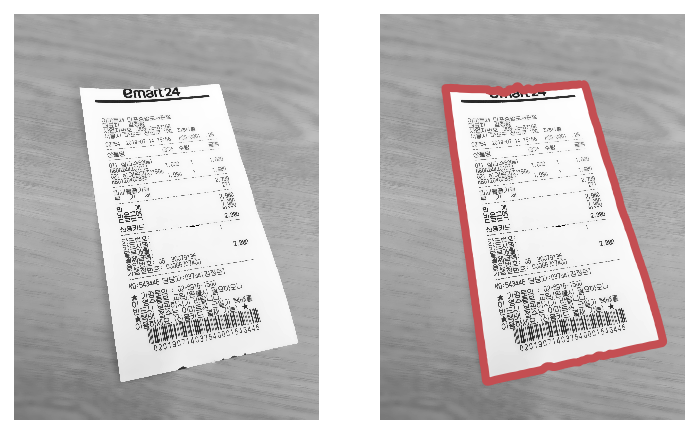

In [97]:
x0, y0 = zip(*np.squeeze(c0))

plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(122)
plt.imshow(img, cmap=plt.cm.gray)
plt.plot(x0, y0, c="r", lw=4)
plt.axis("off")
plt.show()

In [98]:
len(contours)

1

In [99]:
contours[0].shape

(303, 1, 2)

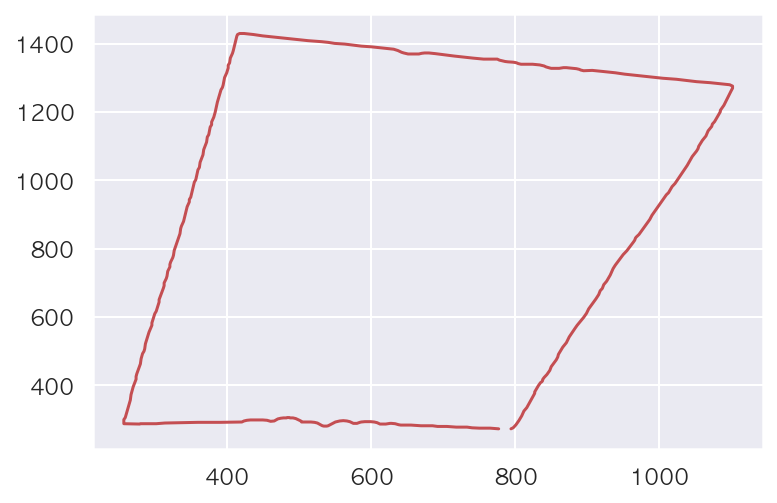

In [100]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="r")
plt.show()

In [101]:
hierachy

array([[[-1, -1, -1, -1]]], dtype=int32)

In [102]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 676777.0,
 'm10': 435865044.0,
 'm01': 573511797.3333333,
 'm20': 305702250023.8333,
 'm11': 380288452240.1666,
 'm02': 550265896614.1666,
 'm30': 229807511953089.72,
 'm21': 273723255249299.2,
 'm12': 371524834533140.5,
 'm03': 573570295715861.0,
 'mu20': 24991858593.388855,
 'mu11': 10929350528.35846,
 'mu02': 64262705488.4187,
 'mu30': 734893131180.0938,
 'mu21': 588543877781.8047,
 'mu12': -1386615131731.3281,
 'mu03': -1648458513021.125,
 'nu20': 0.0545641473433833,
 'nu11': 0.023861798448018945,
 'nu02': 0.14030327988019625,
 'nu30': 0.0019503394740922116,
 'nu21': 0.0015619418774943752,
 'nu12': -0.0036799503384206283,
 'nu03': -0.004374858837210394}

In [103]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(256, 273, 847, 1158)

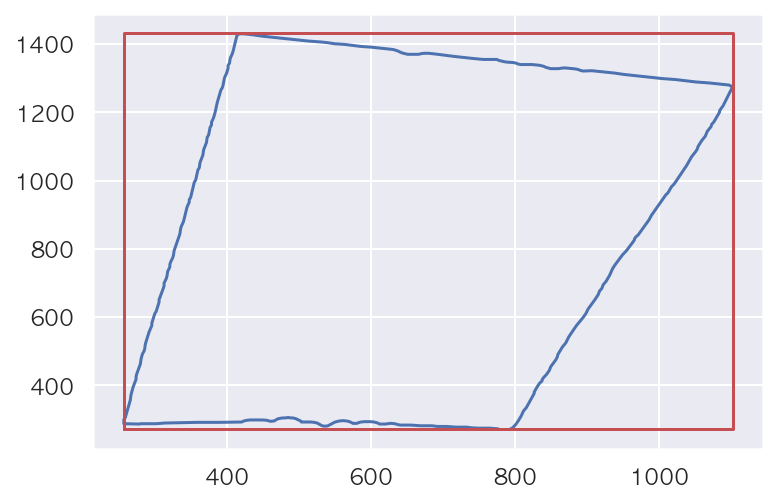

In [104]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

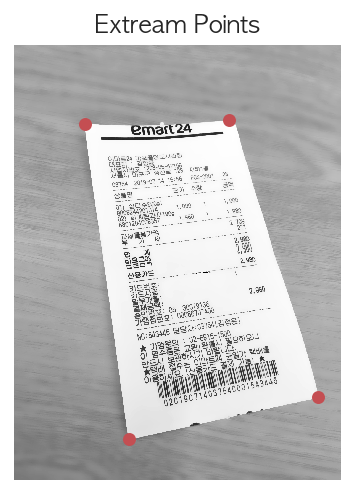

In [105]:
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="r", s=30)
plt.title("Extream Points")

plt.show()